<a href="https://colab.research.google.com/github/elichen/aoc2018/blob/main/Day_10_The_Stars_Align.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = """position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>""".split('\n')

In [ ]:
data = [x.rstrip() for x in open("input.txt").readlines()]

In [ ]:
import numpy as np
import re

def plot_points(input_list, t):
    # Extracting positions and velocities
    points = []
    for line in input_list:
        positions, velocities = re.findall(r'<(.*?)>', line)
        x, y = map(int, positions.split(','))
        vx, vy = map(int, velocities.split(','))
        points.append(((x, y), (vx, vy)))

    # Updating positions based on time and velocities
    for i, ((x, y), (vx, vy)) in enumerate(points):
        points[i] = (x + vx * t, y + vy * t)

    # Finding the size of the grid
    max_x = max(point[0] for point in points) + 1
    min_x = min(point[0] for point in points)
    max_y = max(point[1] for point in points) + 1
    min_y = min(point[1] for point in points)

    # Creating a zero-filled numpy array
    grid = np.zeros((max_y - min_y, max_x - min_x), dtype=int)

    # Marking the points on the grid
    for x, y in points:
        grid[y - min_y, x - min_x] = 1

    return grid


In [ ]:
def calculate_optimized_time_to_origin(input_list, target_distance=100):
    optimized_times = []
    for line in input_list:
        # Extracting position and velocity
        positions, velocities = re.findall(r'<(.*?)>', line)
        x, y = map(int, positions.split(','))
        vx, vy = map(int, velocities.split(','))

        # If the velocity is zero, the point will never move, thus we check if it's already within the target distance
        if vx == 0 and vy == 0:
            distance = (x**2 + y**2)**0.5
            t = 0 if distance <= target_distance else float('inf')
            optimized_times.append(t)
            continue

        # Solving the quadratic equation: (x + vx * t)^2 + (y + vy * t)^2 = target_distance^2
        # This simplifies to a quadratic equation at^2 + bt + c = 0
        a = vx**2 + vy**2
        b = 2 * (x * vx + y * vy)
        c = x**2 + y**2 - target_distance**2

        # Calculate discriminant to check for real solutions
        discriminant = b**2 - 4 * a * c

        if discriminant < 0:
            # No real solution, meaning the point never comes within the target distance
            t = float('inf')
        else:
            # Calculating the two possible solutions
            t1 = (-b + discriminant**0.5) / (2 * a)
            t2 = (-b - discriminant**0.5) / (2 * a)

            # We need the smallest positive time
            t = min(filter(lambda x: x >= 0, [t1, t2]), default=float('inf'))

        optimized_times.append(t)

    return optimized_times

optimized_times_to_origin = calculate_optimized_time_to_origin(data)
optimized_times_to_origin


[10638.131952050877,
 10511.825869981853,
 inf,
 inf,
 inf,
 inf,
 10655.279485681389,
 inf,
 inf,
 inf,
 10558.716394008645,
 10635.500483570302,
 inf,
 inf,
 inf,
 inf,
 10629.464054305847,
 inf,
 inf,
 inf,
 10641.469051105025,
 inf,
 inf,
 10637.802285613903,
 inf,
 inf,
 inf,
 inf,
 10537.532650166058,
 inf,
 10510.807501172241,
 inf,
 inf,
 10553.970163854363,
 inf,
 inf,
 10624.388893783651,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 10635.729112391567,
 inf,
 inf,
 inf,
 10545.602455547814,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 10553.462540459932,
 10545.786873332934,
 10494.871110209635,
 inf,
 10629.635083268962,
 inf,
 inf,
 10540.283181027678,
 10647.515916964,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 10536.129745705555,
 inf,
 10553.420379881885,
 10553.570940790185,
 inf,
 inf,
 10534.563493683849,
 10554.888114189533,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 10653.345240525774,
 inf,
 inf,
 inf,
 10512.674202866632,
 10628.067378264454,
 inf,
 inf,
 

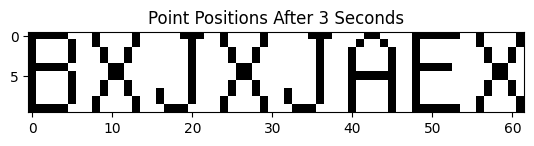

In [ ]:
result = plot_points(data, 10605)
import matplotlib.pyplot as plt

# Plotting the numpy array
plt.imshow(result, cmap='Greys', origin='upper')
plt.title('Point Positions After 3 Seconds')
plt.show()